## Load and inspect

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import FreqDist

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/abel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/abel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [131]:

df = pd.read_csv('data/raw_analyst_ratings.csv')
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype                    
---  ------      --------------    -----                    
 0   Unnamed: 0  1407328 non-null  int64                    
 1   headline    1407328 non-null  object                   
 2   url         1407328 non-null  object                   
 3   publisher   1407328 non-null  object                   
 4   date        55987 non-null    datetime64[ns, UTC-04:00]
 5   stock       1407328 non-null  object                   
dtypes: datetime64[ns, UTC-04:00](1), int64(1), object(4)
memory usage: 64.4+ MB


In [133]:
unique_stocks = df['stock'].dropna().unique()
print(f"Total unique tickers: {len(unique_stocks)}")
print(sorted(unique_stocks))



Total unique tickers: 6204
['A', 'AA', 'AAC', 'AADR', 'AAL', 'AAMC', 'AAME', 'AAN', 'AAOI', 'AAON', 'AAP', 'AAPL', 'AAU', 'AAV', 'AAVL', 'AAWW', 'AAXJ', 'AB', 'ABAC', 'ABAX', 'ABB', 'ABBV', 'ABC', 'ABCB', 'ABCD', 'ABCO', 'ABCW', 'ABDC', 'ABEV', 'ABG', 'ABGB', 'ABIO', 'ABM', 'ABMD', 'ABR', 'ABTL', 'ABX', 'ABY', 'ACAD', 'ACAS', 'ACAT', 'ACC', 'ACCO', 'ACCU', 'ACE', 'ACET', 'ACFC', 'ACFN', 'ACG', 'ACGL', 'ACH', 'ACHC', 'ACHN', 'ACIW', 'ACLS', 'ACM', 'ACMP', 'ACN', 'ACNB', 'ACOR', 'ACP', 'ACPW', 'ACRE', 'ACRX', 'ACSF', 'ACST', 'ACT', 'ACTA', 'ACTG', 'ACTS', 'ACU', 'ACUR', 'ACWI', 'ACWV', 'ACWX', 'ACXM', 'ACY', 'ADAT', 'ADBE', 'ADC', 'ADEP', 'ADES', 'ADGE', 'ADHD', 'ADI', 'ADK', 'ADM', 'ADMA', 'ADMP', 'ADMS', 'ADNC', 'ADP', 'ADPT', 'ADRA', 'ADRD', 'ADRE', 'ADRU', 'ADS', 'ADSK', 'ADT', 'ADTN', 'ADVS', 'ADX', 'ADXS', 'ADZ', 'AE', 'AEB', 'AEC', 'AEE', 'AEG', 'AEGN', 'AEGR', 'AEHR', 'AEIS', 'AEL', 'AEM', 'AEO', 'AEPI', 'AER', 'AERI', 'AES', 'AET', 'AETI', 'AEY', 'AEZS', 'AF', 'AFA', 'AFAM', 'AF

## Textual Lengths (Headline or Summary)

In [134]:
df['headline'].apply(len).max()


np.int64(512)

### Publisher Analysis 

In [135]:
df['publisher'] = df['publisher'].astype(str)

publisher_counts = df['publisher'].value_counts()
print("Top Publishers by Article Count:")
print(publisher_counts.head(10))


Top Publishers by Article Count:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


In [136]:
summary_df = pd.DataFrame({
    'headline': df['headline'].astype(str),
    'headline_length': df['headline'].astype(str).apply(len),
    'word_count': df['headline'].astype(str).apply(lambda x: len(x.split())),
    'publisher': df['publisher']
})

summary_df.sort_values('headline_length', ascending=False).head()


,headline,headline_length,word_count,publisher
701748,JinkoSolar Tiger Pro Series Receives World's F...,512,77,Charles Gross
238137,Check Point® Software Technologies Ltd. (NASDA...,509,68,Charles Gross
172392,Shares of several financial services companies...,458,70,Benzinga Newsdesk
753834,Shares of several financial services companies...,458,70,Benzinga Newsdesk
140048,Shares of several financial services companies...,458,70,Benzinga Newsdesk


## Articles per Publisher

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Name: count, dtype: int64

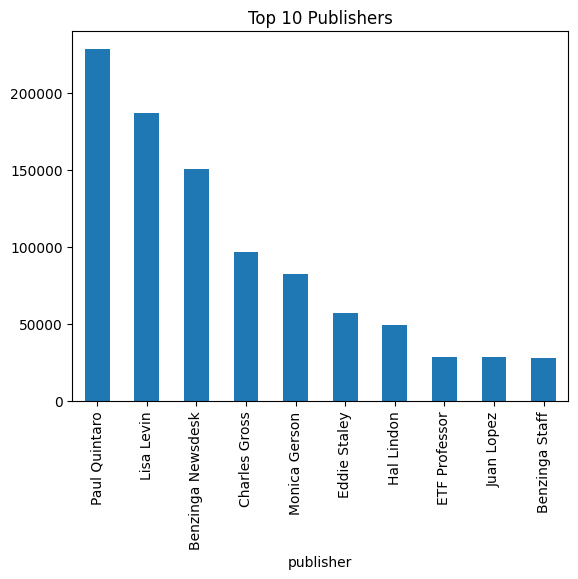

In [137]:
df['publisher'].value_counts().head(10).plot(kind='bar', title='Top 10 Publishers')
df['publisher'].value_counts().head()

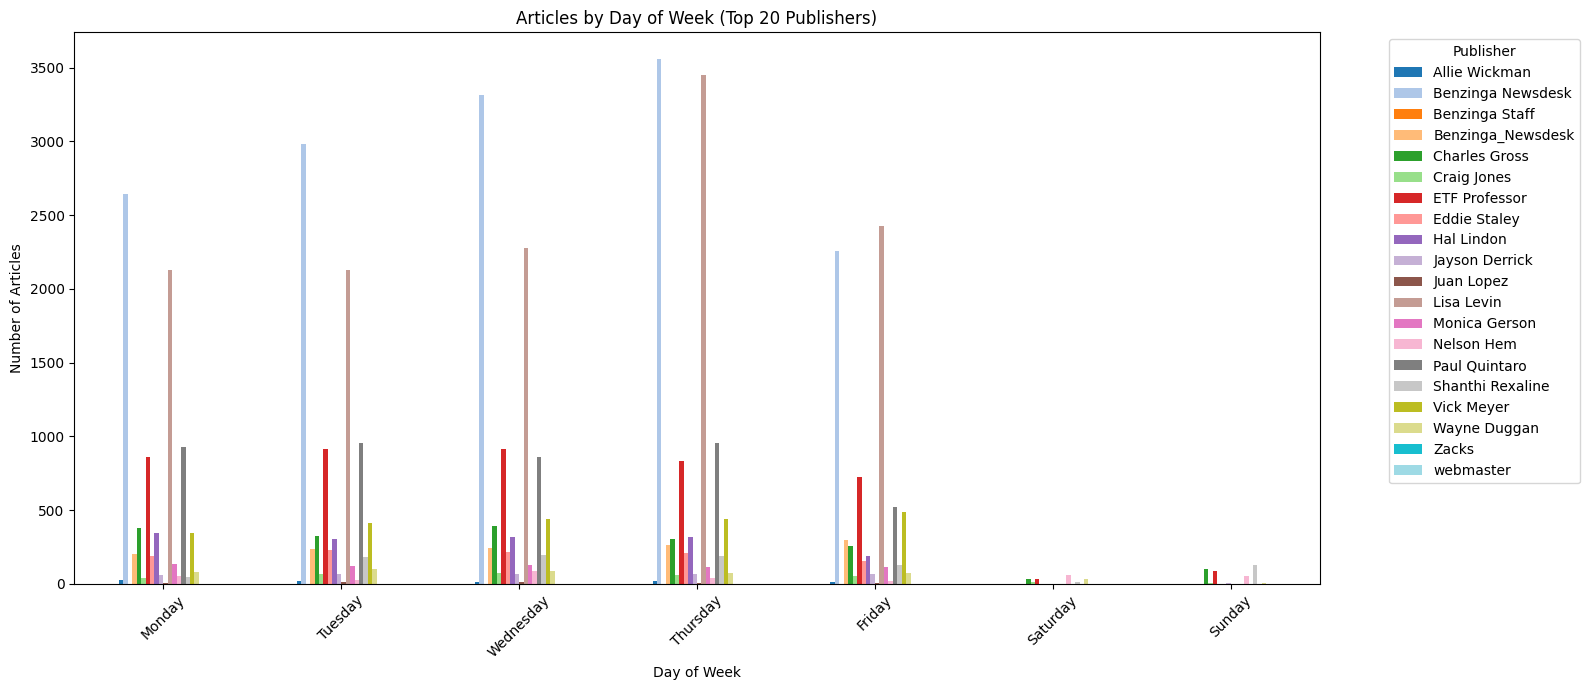

In [138]:

top_publishers = (
    df['publisher'].value_counts()
    .nlargest(20)
    .index
)

day_publisher_counts = (
    df[df['publisher'].isin(top_publishers)]
    .groupby([df['date'].dt.day_name(), 'publisher'])
    .size()
    .unstack(fill_value=0)
    .loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
)

day_publisher_counts.plot(
    kind='bar',
    figsize=(16, 7),
    title='Articles by Day of Week (Top 20 Publishers)',
    colormap='tab20'
)
plt.ylabel('Number of Articles')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.legend(title='Publisher', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


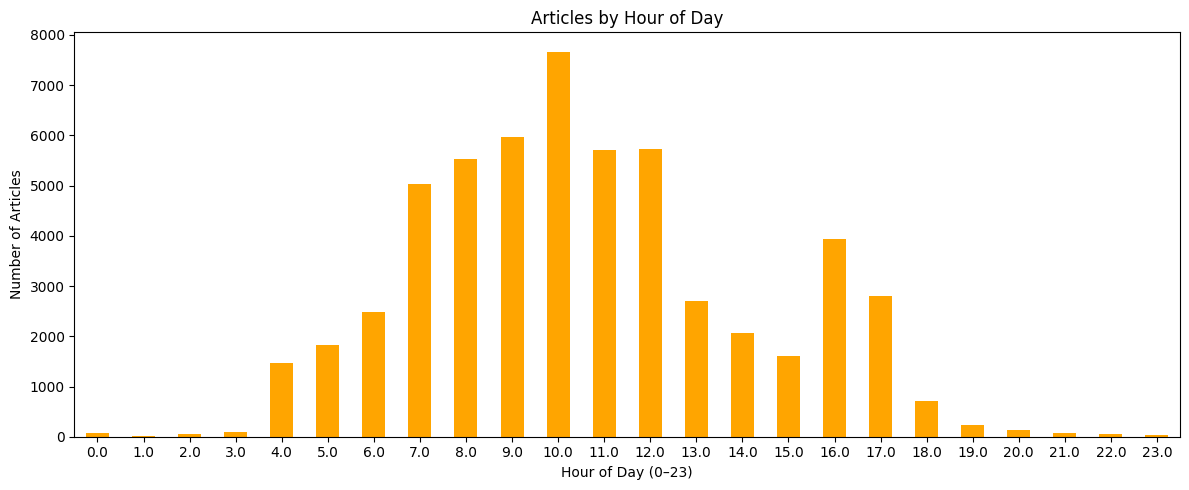

In [139]:
df['date'].dt.hour.value_counts().sort_index()

df['date'].dt.hour.value_counts().sort_index().plot(
    kind='bar', figsize=(12, 5), color='orange',
    title='Articles by Hour of Day'
)
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Publication Date Trends


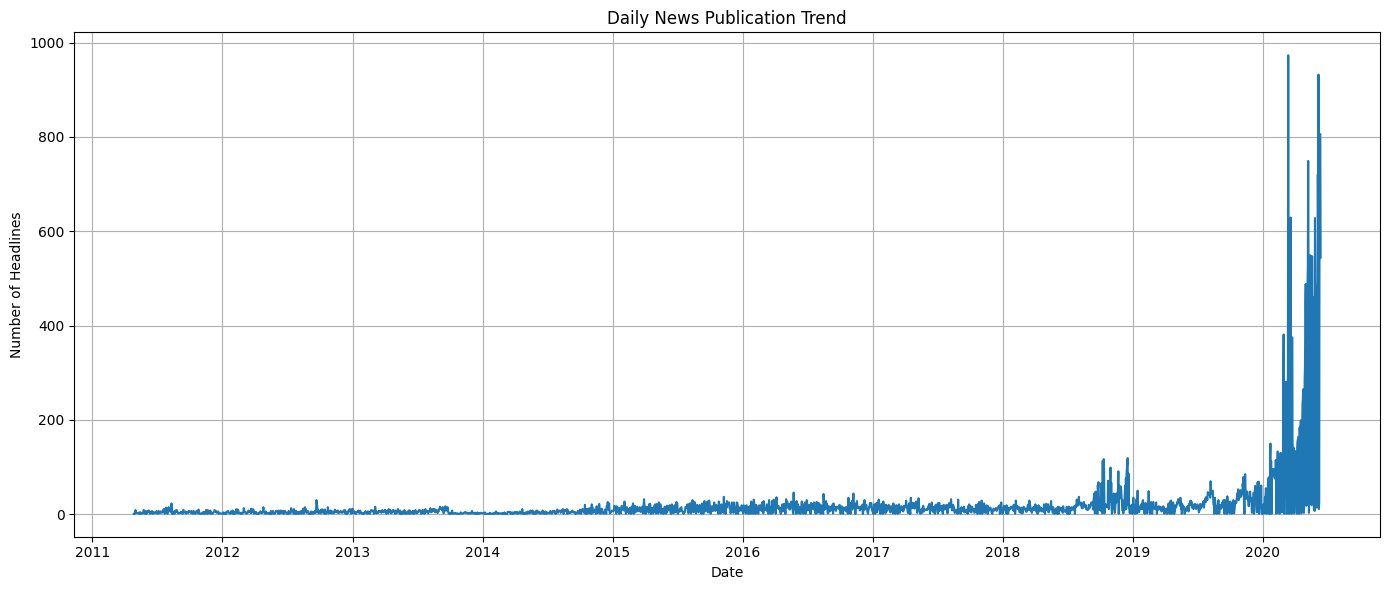

In [140]:
df['date'] = pd.to_datetime(df['date'])
daily_counts = df['date'].dt.date.value_counts().sort_index()

plt.figure(figsize=(14, 6))
daily_counts.plot(kind='line')
plt.title('Daily News Publication Trend')
plt.xlabel('Date')
plt.ylabel('Number of Headlines')
plt.grid(True)
plt.tight_layout()
plt.show()


date
Monday       10322
Tuesday      11002
Wednesday    11891
Thursday     12688
Friday        9381
Saturday       267
Sunday         436
Name: count, dtype: int64

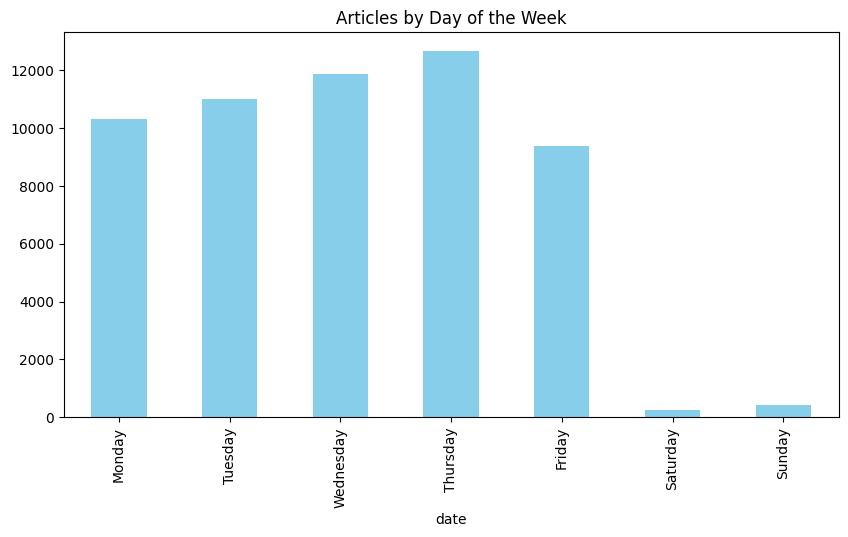

In [141]:
df['date'].dt.day_name().value_counts().loc[
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
].plot(kind='bar', figsize=(10, 5), title='Articles by Day of the Week', color='skyblue')

df['date'].dt.day_name().value_counts().loc[
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
]

# Text Analysis (Topic Modeling)

## Topic Modeling using LDA

In [142]:
import re

def clean_text(text):
    text = str(text).lower()                       
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['headline'].apply(clean_text).head()
df['headline'] = df['headline'].apply(clean_text)


stop_words = set(stopwords.words('english'))
df['tokens'] = df['headline'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

Top 20 Frequent Words:
[('vs', 162147), ('stocks', 161868), ('q', 157878), ('est', 140606), ('eps', 128929), ('shares', 114209), ('reports', 108707), ('update', 91680), ('market', 90880), ('earnings', 87185), ('sales', 79526), ('top', 78678), ('pt', 73054), ('week', 67669), ('announces', 66529), ('price', 64232), ('buy', 64060), ('downgrades', 61942), ('trading', 61158), ('benzingas', 57985)]


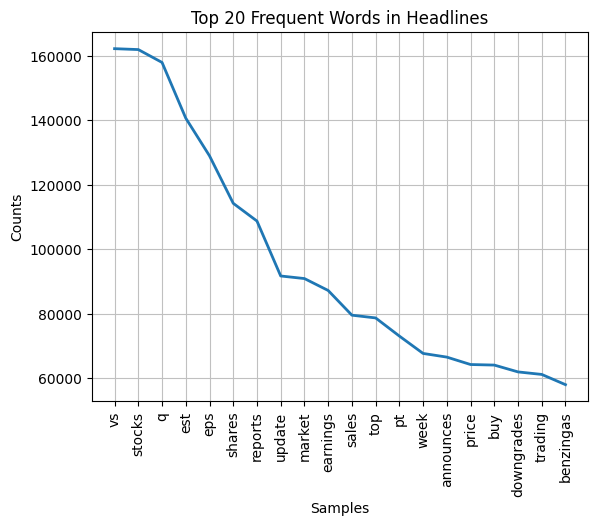

In [143]:
all_words = [word for tokens in df['tokens'] for word in tokens]
freq_dist = FreqDist(all_words)

# Most common words
print("Top 20 Frequent Words:")
print(freq_dist.most_common(20))

freq_dist.plot(20, title="Top 20 Frequent Words in Headlines")
plt.show()


In [144]:
from nltk.util import ngrams
from collections import Counter

# Extract bigrams from all headlines
all_bigrams = [bigram for tokens in df['tokens'] for bigram in ngrams(tokens, 1)]

# Count bigrams
bigram_freq = Counter(all_bigrams)

print("Top 20 Bigrams (2-word phrases):")
for phrase, freq in bigram_freq.most_common(20):
    print(' '.join(phrase), ":", freq)


Top 20 Bigrams (2-word phrases):
vs : 162147
stocks : 161868
q : 157878
est : 140606
eps : 128929
shares : 114209
reports : 108707
update : 91680
market : 90880
earnings : 87185
sales : 79526
top : 78678
pt : 73054
week : 67669
announces : 66529
price : 64232
buy : 64060
downgrades : 61942
trading : 61158
benzingas : 57985


# Time Series Analysis
## Frequency Over Time

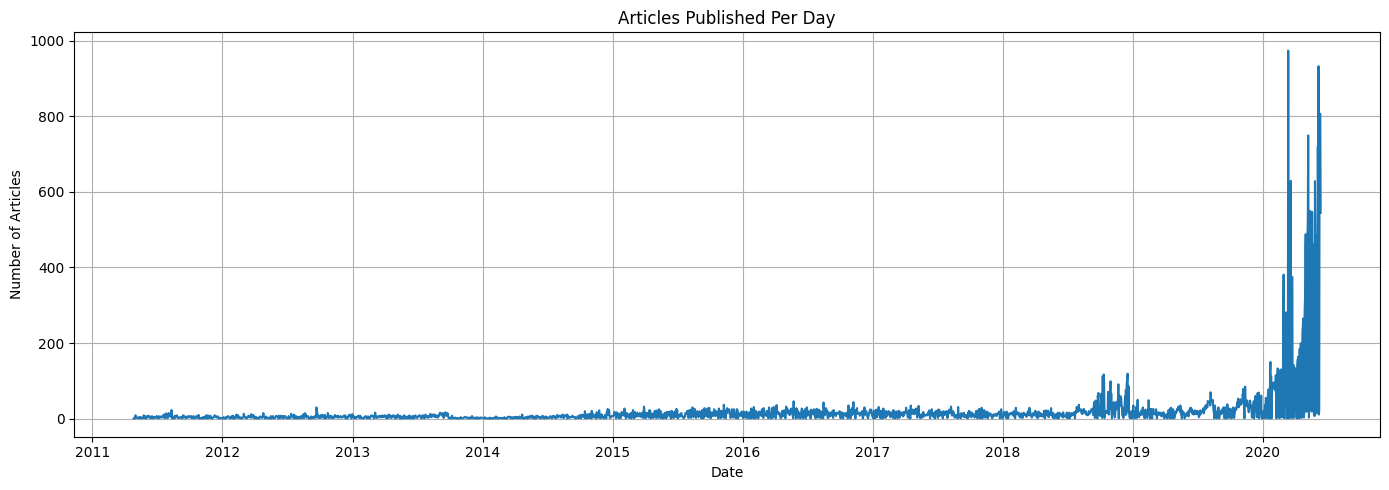

In [145]:
daily_counts = df.groupby(df['date'].dt.date).size()

plt.figure(figsize=(14, 5))
daily_counts.plot(kind='line')
plt.title("Articles Published Per Day")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.tight_layout()
plt.show()


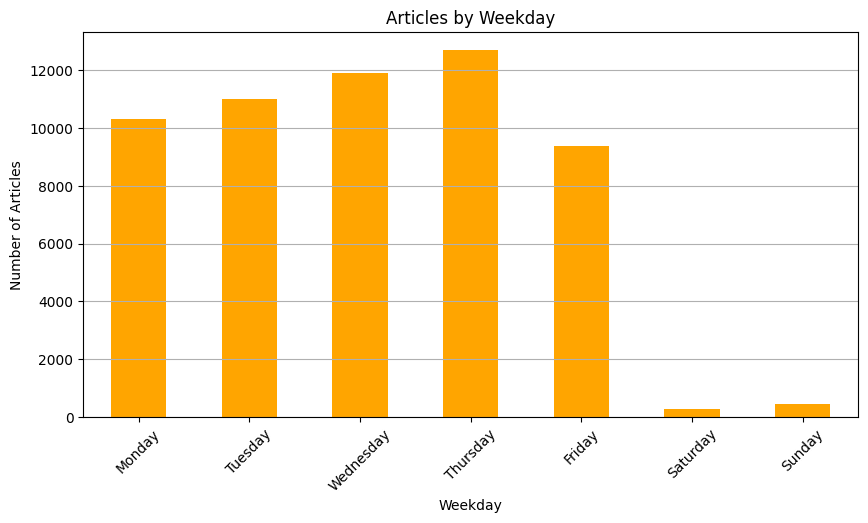

In [146]:
# Map weekdays
df['weekday'] = df['date'].dt.day_name()

weekday_counts = df['weekday'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot
weekday_counts.plot(kind='bar', color='orange', figsize=(10, 5))
plt.title("Articles by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


## Hourly Patterns

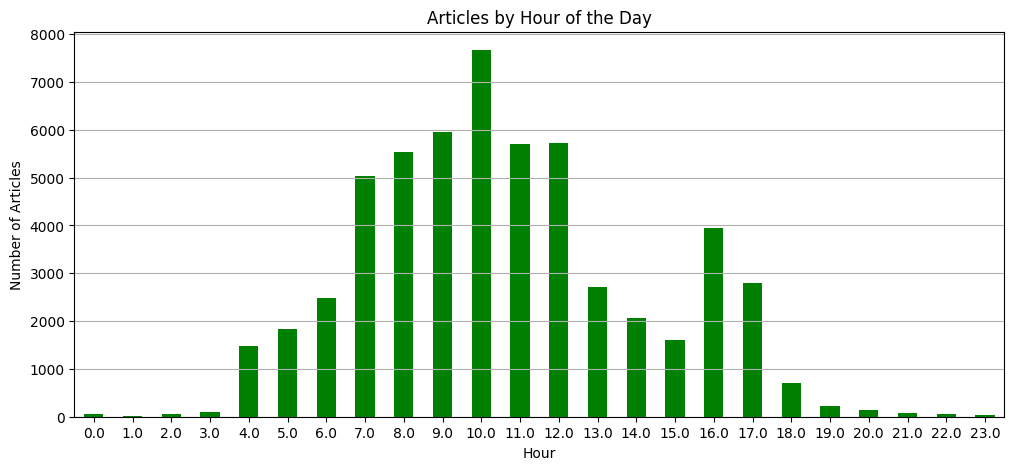

In [ ]:
df['hour'] = df['date'].dt.hour
hourly_counts = df['hour'].value_counts().sort_index()
hourly_counts
hourly_counts.plot(kind='bar', color='green', figsize=(12, 5))
plt.title("Articles by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Number of Articles")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


# Publisher Analysis
## Top Publishers

<Axes: title={'center': 'Top 10 Most Active Publishers'}, ylabel='publisher'>

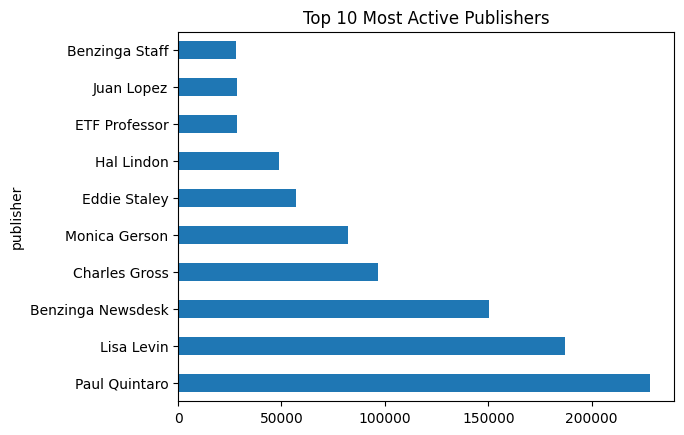

In [ ]:
top_publishers = df['publisher'].value_counts().head(10)
top_publishers.plot(kind='barh', title='Top 10 Most Active Publishers')

## Ratings by Publisher

In [149]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Clean and tokenize headlines
stop_words = set(stopwords.words('english'))

def extract_keywords(text):
    words = word_tokenize(str(text).lower())
    return [word for word in words if word.isalpha() and word not in stop_words]

# Let's take the top 3 publishers
top3_publishers = df['publisher'].value_counts().head(3).index.tolist()

for pub in top3_publishers:
    headlines = df[df['publisher'] == pub]['headline']
    tokens = []
    for line in headlines:
        tokens.extend(extract_keywords(line))
    most_common = Counter(tokens).most_common(10)
    print(f"Top keywords for publisher: {pub}")
    for word, freq in most_common:
        print(f"   {word}: {freq}")


[nltk_data] Downloading package punkt to /home/abel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/abel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



📰 Top keywords for publisher: Paul Quintaro
   vs: 86127
   est: 82583
   q: 59303
   eps: 57015
   reports: 55269
   sales: 31402
   b: 24141
   shares: 22817
   sees: 20734
   announces: 20374

📰 Top keywords for publisher: Lisa Levin
   stocks: 68373
   moving: 32324
   session: 32324
   top: 31267
   market: 30329
   biggest: 29090
   benzingas: 28570
   midday: 28141
   week: 25325
   update: 23073

📰 Top keywords for publisher: Benzinga Newsdesk
   shares: 42661
   trading: 38838
   q: 32507
   estimate: 29405
   stocks: 27856
   eps: 27426
   sales: 27376
   companies: 22019
   new: 21456
   several: 19671


## Email Domain Analysis

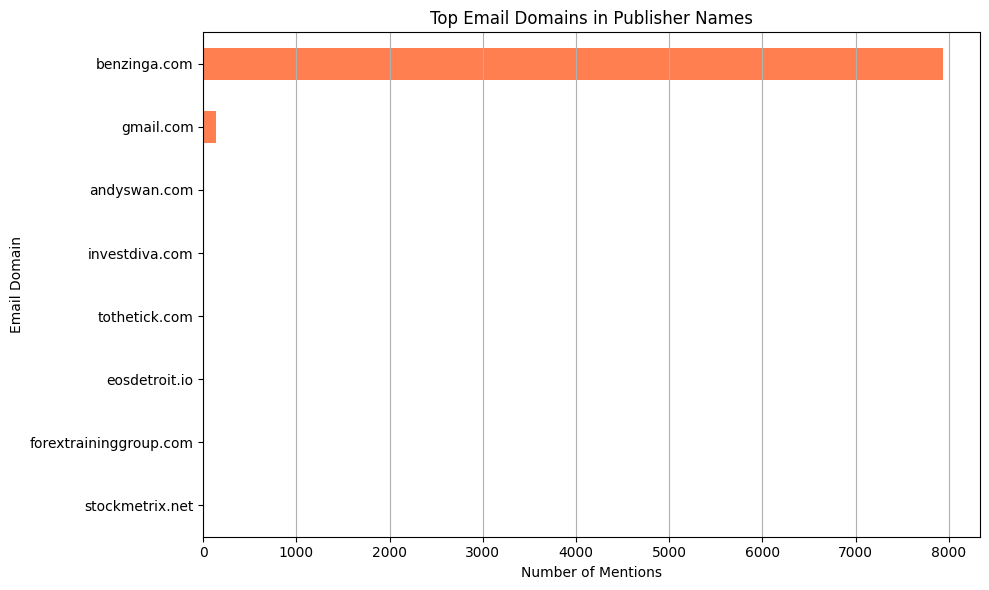

In [150]:
# Check for emails
import re

df['email_domain'] = df['publisher'].apply(
    lambda x: re.search(r'@([\w\.-]+)', str(x)).group(1) if re.search(r'@[\w\.-]+', str(x)) else None
)

# Count top domains
email_domains = df['email_domain'].value_counts().dropna().head(10)

# Plot
email_domains.plot(kind='barh', figsize=(10, 6), color='coral')
plt.gca().invert_yaxis()
plt.title("Top Email Domains in Publisher Names")
plt.xlabel("Number of Mentions")
plt.ylabel("Email Domain")
plt.grid(axis='x')
plt.tight_layout()
plt.show()
